In [18]:
#Dependencies
import pandas as pd
import hvplot.pandas
import numpy as np
import requests 
import json
from scipy.stats import linregress
from matplotlib import pyplot as plt

#Import the API Key
from api_keys import google_api

Pull from the serpapi and set params for Birkenstocks then clean and format the data 

In [13]:
#Shopping Birks
base_url="https://serpapi.com/search"

birk_params = {"engine": "google_shopping",
          "q": "Birkenstocks",
          "api_key": google_api}
# Run request
birk_response= requests.get(base_url, params=birk_params)
birk_resp_data = birk_response.json()
# Print the json (pretty printed)
print(json.dumps(birk_resp_data, indent=4, sort_keys=False))

{
    "search_metadata": {
        "id": "6430cd0e29d177b46f2e689b",
        "status": "Success",
        "json_endpoint": "https://serpapi.com/searches/a8a592261bf1d723/6430cd0e29d177b46f2e689b.json",
        "created_at": "2023-04-08 02:10:22 UTC",
        "processed_at": "2023-04-08 02:10:22 UTC",
        "google_shopping_url": "https://www.google.com/search?tbm=shop&q=Birkenstocks&hl=en&gl=us",
        "raw_html_file": "https://serpapi.com/searches/a8a592261bf1d723/6430cd0e29d177b46f2e689b.html",
        "prettify_html_file": "https://serpapi.com/searches/a8a592261bf1d723/6430cd0e29d177b46f2e689b.prettify",
        "total_time_taken": 5.64
    },
    "search_parameters": {
        "engine": "google_shopping",
        "q": "Birkenstocks",
        "google_domain": "google.com",
        "hl": "en",
        "gl": "us",
        "device": "desktop"
    },
    "search_information": {
        "shopping_results_state": "Results for exact spelling",
        "error_message": "Google has retur

In [14]:
#Birks
birk_shop=birk_resp_data["shopping_results"]
#Convert to a DataFrame
birk_shop=pd.DataFrame(birk_shop)
#Colum Renaming
birk_shop= birk_shop.rename(
    columns = {
        "title" : "Product name",
        "source": "Selling Source",
        "price": "Price ($)",
        "extracted_price": "Extracted Price",
        "rating": "Rating",
        "reviews": "Reviews",

    }
)
# Configure the final DataFrame
birk_shop = birk_shop[
    [
        "Product name", 
        "Selling Source",
        "Price ($)",
        "Extracted Price",
        "Rating",
        "Reviews",
    ]
]
#Cleaning the Data
birk_shop["Reviews"].fillna(0,inplace=True)
birk_shop["Rating"].fillna(0,inplace=True)
birk_shop.Reviews=birk_shop.Reviews.astype(int)
# sub2["Price ($)"]=sub2["Price ($)"].str.replace(",","")#if you need to remove commas 
birk_shop["Price ($)"]=birk_shop["Price ($)"].str.replace("$","").astype(float)
birk_shop.head()

/var/folders/4y/bplz9gkx115983933b15hd8r0000gp/T/ipykernel_48017/1752861072.py:33: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  birk_shop["Price ($)"]=birk_shop["Price ($)"].str.replace("$","").astype(float)


,Product name,Selling Source,Price ($),Extracted Price,Rating,Reviews
0,Birkenstock Arizona Sandals Mocca,BIRKENSTOCK,59.95,59.95,4.7,151
1,Birkenstock Black Arizona Sandals,ssense.com,190.00,190.00,4.5,6404
2,Birkenstock Arizona Sandals - Brown,Amazon.com - Seller,79.99,79.99,4.7,13725
3,"Birkenstock Men's Arizona Eva Sandals, Multi/B...",DICK'S Sporting Goods,30.97,30.97,4.4,124
4,Birkenstock Brown Arizona Sandals,The Golden Boot,93.16,93.16,4.7,583


Pull from the serpapi and set params for Crocs then clean and format the data 

In [16]:
base_url="https://serpapi.com/search"
#Crocs Params
croc_params = {"engine": "google_shopping",
          "q": "Crocs",
          "api_key": google_api}
# Run request
croc_response= requests.get(base_url, params=croc_params)
croc_resp_data = croc_response.json()
# Print the json (pretty printed)
print(json.dumps(croc_resp_data, indent=4, sort_keys=False))

{
    "search_metadata": {
        "id": "6430ce1daf6304def3130ec4",
        "status": "Success",
        "json_endpoint": "https://serpapi.com/searches/c249b6cda65924b5/6430ce1daf6304def3130ec4.json",
        "created_at": "2023-04-08 02:14:53 UTC",
        "processed_at": "2023-04-08 02:14:53 UTC",
        "google_shopping_url": "https://www.google.com/search?tbm=shop&q=Crocs&hl=en&gl=us",
        "raw_html_file": "https://serpapi.com/searches/c249b6cda65924b5/6430ce1daf6304def3130ec4.html",
        "prettify_html_file": "https://serpapi.com/searches/c249b6cda65924b5/6430ce1daf6304def3130ec4.prettify",
        "total_time_taken": 2.74
    },
    "search_parameters": {
        "engine": "google_shopping",
        "q": "Crocs",
        "google_domain": "google.com",
        "hl": "en",
        "gl": "us",
        "device": "desktop"
    },
    "search_information": {
        "shopping_results_state": "Results for exact spelling",
        "error_message": "Google has returned malformed 

In [39]:
#Crocs
croc_shop=croc_resp_data["shopping_results"]
#Convert to a DataFrame
croc_shop=pd.DataFrame(croc_shop)
#Column Renaming
croc_shop= croc_shop.rename(
    columns = {
        "title" : "Product name",
        "source": "Selling Source",
        "price": "Price ($)",
        "extracted_price": "Extracted Price",
        "rating": "Rating",
        "reviews": "Reviews",

    }
)
# Configure the final DataFrame
croc_shop = croc_shop[
    [
        "Product name", 
        "Selling Source",
        "Price ($)",
        "Extracted Price",
        "Rating",
        "Reviews",
    ]
]
#Cleaning the Data
croc_shop["Reviews"].fillna(0,inplace=True)
croc_shop["Rating"].fillna(0,inplace=True)
croc_shop.Reviews=croc_shop.Reviews.astype(int)
# sub2["Price ($)"]=sub2["Price ($)"].str.replace(",","")#if you need to remove commas 
croc_shop["Price ($)"]=croc_shop["Price ($)"].str.replace("$","").astype(float)
croc_shop.head()

/var/folders/4y/bplz9gkx115983933b15hd8r0000gp/T/ipykernel_48017/1997962373.py:33: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  croc_shop["Price ($)"]=croc_shop["Price ($)"].str.replace("$","").astype(float)


,Product name,Selling Source,Price ($),Extracted Price,Rating,Reviews
0,Crocs Adult Classic Clog - Slate Grey,Amazon.com,29.32,29.32,4.7,1413
1,"Crocs Unisex Classic Clogs, Size: Men's 5/Wome...",Kohl's,49.99,49.99,4.6,13529
2,"Crocs Kids' Classic Clogs, Kids Unisex, Size: ...",Scheels,27.99,27.99,4.8,814
3,Crocs Mens Classic - Mens Shoes White/Grey Siz...,Foot Locker,70.00,70.00,3.7,3
4,Crocs Classic Clog 204536 Pink,DICK'S Sporting Goods,26.24,26.24,4.7,2221


Merge and Save both Croc and Birkenstocks 

In [75]:
#Merge the two Data Frames together 
croc_birk_df=pd.merge(birk_shop,croc_shop,on='Selling Source')
croc_birk_df.tail()

,Product name_x,Selling Source,Price ($)_x,Extracted Price_x,Rating_x,Reviews_x,Product name_y,Price ($)_y,Extracted Price_y,Rating_y,Reviews_y
24,"Birkenstock Women's Arizona Sandals, Black, Si...",Academy Sports + Outdoors,109.99,109.99,4.7,9669,Crocs Solarized Classic Clog,39.99,39.99,4.7,1069
25,Birkenstock Women's Arizona Pink Wool Shearling,Poshmark,60.00,60.00,4.3,91,Crocs - Unisex Baya Tie Dye Clog,42.00,42.00,4.6,359
26,"Birkenstock Women's Arizona Sandals, Black, 41",Backcountry.com,110.00,110.00,4.8,1251,Crocs Classic Fuzz Lined Clog (Navy / Charcoal),44.96,44.96,4.8,6424
27,Birkenstock Men's Arizona Essentials Eva Two-S...,Macy's,50.00,50.00,3.7,18,Crocs Big Kids' All-Terrain Black Panther Clas...,40.00,40.00,5.0,21
28,"Birkenstock Women's Arizona Sandals, Black, 8",Hibbett Sports,110.00,110.00,4.6,14115,Crocs 7Eleven x Classic Clog - Black / 11,70.00,70.00,4.8,48


In [76]:
#Save the Data Frame as a CSV File
croc_birk_df.to_csv("data/croc_birk_merged.csv")

In [98]:
#Remove Extracted Price 
croc_birk_df.drop('Extracted Price_x',axis=1, inplace=True)
croc_birk_df.drop('Extracted Price_y',axis=1, inplace=True)

In [27]:
# Column renaming
croc_birk_df = croc_birk_df.rename(
    columns = {
        "Product name_x" : "Birkenstock Products",
        "Selling Source" : "Selling Source",
        "Price ($)_x": "Birkenstock Price",
        "Rating_x": "Birkenstock Ratings",
        "Reviews_x":"Birkenstock Reviews",
        "Product name_y" : "Croc Products",
        "Selling Source" : "Selling Source",
        "Price ($)_y": "Crocs Price",
        "Rating_y": "Crocs Ratings",
        "Reviews_y":"Crocs Reviews",})
croc_birk_df.head()

,Birkenstock Products,Selling Source,Birkenstock Price,Birkenstock Ratings,Birkenstock Reviews,Croc Products,Crocs Price,Crocs Ratings,Crocs Reviews
0,Birkenstock Black Arizona Sandals,ssense.com,190.00,4.5,6404,Crocs Purple Classic Clogs,50.00,4.4,18
1,Birkenstock Black Arizona Sandals,ssense.com,190.00,4.5,6404,"Crocs Mega Crush Sandal, Light Grey, M13",60.00,4.1,198
2,Birkenstock Arizona Sandals - Brown,Amazon.com - Seller,79.99,4.7,13725,Crocs Unisex-Adult Classic Clog,25.00,0.0,0
3,Birkenstock Men's Arizona Essentials EVA Sanda...,DICK'S Sporting Goods,49.95,4.5,1462,Crocs Classic Clog 204536 Pink,26.24,4.7,2221
4,Birkenstock Arizona Toe Loop Sandal in Electri...,Nordstrom,59.95,4.5,6087,Crocs Kids Classic Clog White,39.99,4.8,1358


In [ ]:
#Save the Data Frame as a CSV File
croc_birk_df.to_csv("data/croc_birk_df_cleaned.csv")

Create Graphs to Analyze Ratings, Number of Customer Reviews, and the Price differences

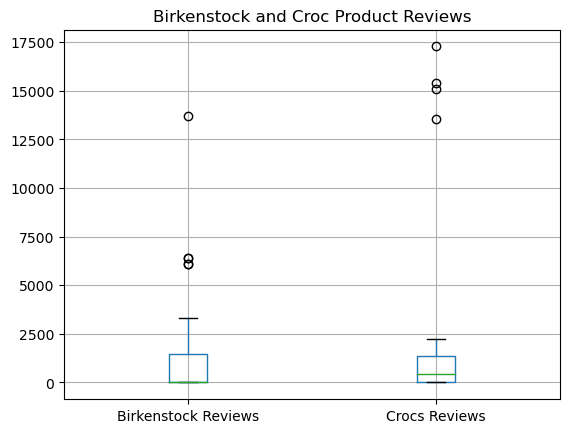

In [26]:
#Create a boxplot to show the comparison of Reviews for Crocs vs. Birks
bc_review=croc_birk_df.boxplot(column = ['Birkenstock Reviews', 'Crocs Reviews']) 
plt.title("Birkenstock and Croc Product Reviews")
bc_review.plot() 
plt.savefig("data/reviews.png")

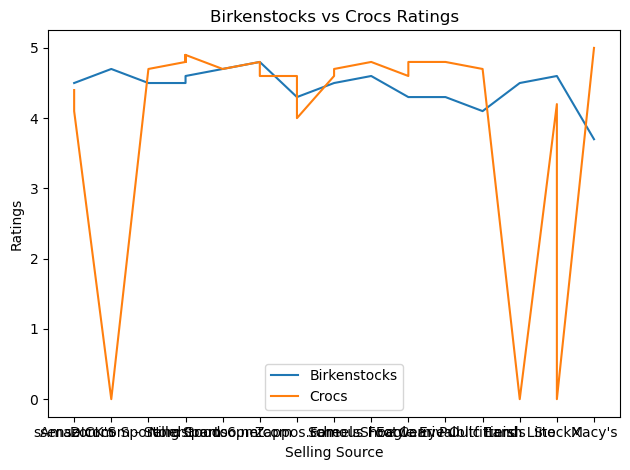

In [56]:
#Price vs Review for Birk
x = croc_birk_df['Selling Source']
y1 = croc_birk_df['Birkenstock Ratings']
y2 = croc_birk_df['Crocs Ratings']
plt.plot(x, y1, label="Birkenstocks")
plt.plot(x, y2, label="Crocs")
plt.tight_layout()
# Add labels and title to plot
plt.xlabel("Selling Source")
plt.ylabel("Ratings")
plt.title("Birkenstocks vs Crocs Ratings")
plt.legend(loc="lower center")
plt.tight_layout()
#plt.savefig("data/birk_croc_review_price.png")

In [ ]:
#Croc and Birk Comparison of Selling Source and Rating 


Extra-Unsure if needed..did not want to delete

The r-squared is: 0.04205840689795314


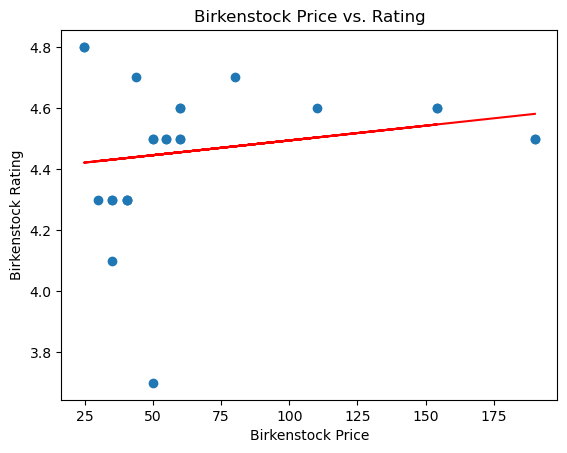

In [54]:
# Showing Ratings vs Price for Birk
x_values = croc_birk_df['Birkenstock Price']
y_values = croc_birk_df['Birkenstock Ratings']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Birkenstock Price')
plt.ylabel('Birkenstock Rating')
plt.title("Birkenstock Price vs. Rating")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("data/birk_rating_price.png")
plt.show()

The r-squared is: 0.05564335447554454


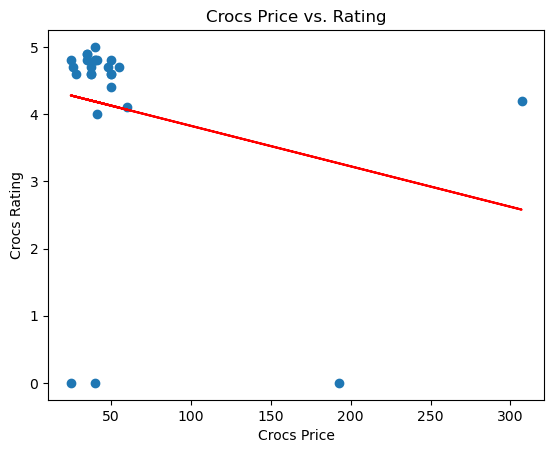

In [53]:
# Showing Ratings vs Price for Croc
x_values = croc_birk_df['Crocs Price']
y_values = croc_birk_df['Crocs Ratings']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Crocs Price')
plt.ylabel('Crocs Rating')
plt.title("Crocs Price vs. Rating")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("data/croc_rating_price.png")
plt.show()